In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=25000, 
                                     batch_size=32, 
                                     learning_rate=1e-3, 
                                     num_epochs=5,
                                     device=device, 
                                     net=net)

Number of Training Images: 19,963
Number of Validation Images: 5,037


In [6]:
standardTraining.train()

Epoch [1/5]
Epoch Loss: 199.0297         
Training Time: 0:02:50.577999)          
Validation Time: 0:00:26.472235)

TRAINING



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2241,0.002231,0.151515,0.004398,0.583064,0.136057
4,Edema,4746,0.108091,0.486256,0.176866,0.697197,0.388879
5,Consolidation,1163,0.002580,0.093750,0.005021,0.575168,0.072648
7,Atelectasis,3178,0.002832,0.310345,0.005613,0.558194,0.185306
9,Pleural_Effusion,6766,0.291014,0.536074,0.377239,0.687271,0.497824



VALIDATION



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,530,0.000000,0.000000,0.000000,0.651333,0.153802
4,Edema,1182,0.318951,0.458080,0.376060,0.739854,0.430831
5,Consolidation,308,0.000000,0.000000,0.000000,0.624975,0.082735
7,Atelectasis,781,0.000000,0.000000,0.000000,0.540056,0.178462
9,Pleural_Effusion,1763,0.743619,0.522519,0.613764,0.759353,0.606701


Epoch [2/5]
Epoch Loss: 192.4654         
Training Time: 0:02:50.326685)          
Validation Time: 0:00:26.478219)

TRAINING



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2241,0.000000,0.000000,0.000000,0.631756,0.160928
4,Edema,4746,0.130847,0.511532,0.208389,0.734534,0.428375
5,Consolidation,1163,0.000000,0.000000,0.000000,0.618318,0.080060
7,Atelectasis,3178,0.000000,0.000000,0.000000,0.564829,0.183875
9,Pleural_Effusion,6766,0.467189,0.600951,0.525694,0.759212,0.581421



VALIDATION



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,530,0.000000,0.000000,0.000000,0.654728,0.161691
4,Edema,1182,0.192047,0.553659,0.285176,0.752970,0.457371
5,Consolidation,308,0.000000,0.000000,0.000000,0.638723,0.089866
7,Atelectasis,781,0.000000,0.000000,0.000000,0.595726,0.199926
9,Pleural_Effusion,1763,0.539421,0.643437,0.586856,0.783622,0.640021


Epoch [3/5]
Epoch Loss: 190.1953         
Training Time: 0:02:50.558095)          
Validation Time: 0:00:26.546009)

TRAINING



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2241,0.000446,0.250000,0.000891,0.676171,0.196257
4,Edema,4746,0.146861,0.536154,0.230566,0.739572,0.439472
5,Consolidation,1163,0.000000,0.000000,0.000000,0.617029,0.078525
7,Atelectasis,3178,0.000315,0.333333,0.000629,0.579317,0.191549
9,Pleural_Effusion,6766,0.507094,0.613775,0.555358,0.775005,0.601751



VALIDATION



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,530,0.000000,0.000000,0.000000,0.747620,0.248958
4,Edema,1182,0.130288,0.599222,0.214038,0.753399,0.466989
5,Consolidation,308,0.000000,0.000000,0.000000,0.647271,0.092361
7,Atelectasis,781,0.000000,0.000000,0.000000,0.596617,0.196992
9,Pleural_Effusion,1763,0.305729,0.764539,0.436791,0.792270,0.657564


Epoch [4/5]
Epoch Loss: 187.0122         
Training Time: 0:02:50.351618)          
Validation Time: 0:00:26.502155)

TRAINING



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2241,0.052209,0.565217,0.095588,0.762934,0.304020
4,Edema,4746,0.169195,0.539288,0.257578,0.749509,0.450011
5,Consolidation,1163,0.000000,0.000000,0.000000,0.638695,0.083596
7,Atelectasis,3178,0.000000,0.000000,0.000000,0.596544,0.204561
9,Pleural_Effusion,6766,0.545226,0.635158,0.586766,0.791765,0.626350



VALIDATION



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,530,0.054717,0.659091,0.101045,0.798439,0.347269
4,Edema,1182,0.158206,0.599359,0.250335,0.763109,0.474937
5,Consolidation,308,0.000000,0.000000,0.000000,0.671236,0.101294
7,Atelectasis,781,0.000000,0.000000,0.000000,0.598920,0.209219
9,Pleural_Effusion,1763,0.423710,0.723837,0.534526,0.807655,0.670887


Epoch [5/5]
Epoch Loss: 184.7120         
Training Time: 0:02:50.138147)          
Validation Time: 0:00:26.397412)

TRAINING



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2241,0.105756,0.589552,0.179342,0.789559,0.354269
4,Edema,4746,0.198062,0.540541,0.289900,0.760150,0.462387
5,Consolidation,1163,0.000000,0.000000,0.000000,0.655019,0.090525
7,Atelectasis,3178,0.000000,0.000000,0.000000,0.608607,0.209569
9,Pleural_Effusion,6766,0.558528,0.648421,0.600127,0.804655,0.651175



VALIDATION



,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,530,0.084906,0.592105,0.148515,0.813486,0.378831
4,Edema,1182,0.263959,0.570384,0.360902,0.771076,0.484798
5,Consolidation,308,0.000000,0.000000,0.000000,0.672936,0.098948
7,Atelectasis,781,0.000000,0.000000,0.000000,0.610399,0.208043
9,Pleural_Effusion,1763,0.678389,0.626834,0.651594,0.806934,0.665947



TRAINING



,Score for all Targets
Accuracy Score,0.235085
Hamming Loss,0.119225
Combined Recall,0.239517
Combined Precision,0.286551
Combined F1,0.244654


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1025,0.000000,0.000000,0.000000,0.523297,0.057363
1,Cardiomegaly,2241,0.105756,0.589552,0.179342,0.789559,0.354269
2,Lung_Opacity,9112,0.600527,0.599408,0.599967,0.676207,0.596192
3,Lung_Lesion,846,0.000000,0.000000,0.000000,0.623306,0.063232
4,Edema,4746,0.198062,0.540541,0.289900,0.760150,0.462387
5,Consolidation,1163,0.000000,0.000000,0.000000,0.655019,0.090525
6,Pneumonia,528,0.000000,0.000000,0.000000,0.564012,0.032961
7,Atelectasis,3178,0.000000,0.000000,0.000000,0.608607,0.209569
8,Pneumothorax,1585,0.000631,1.000000,0.001261,0.668947,0.149201
9,Pleural_Effusion,6766,0.558528,0.648421,0.600127,0.804655,0.651175


***** ROC *****


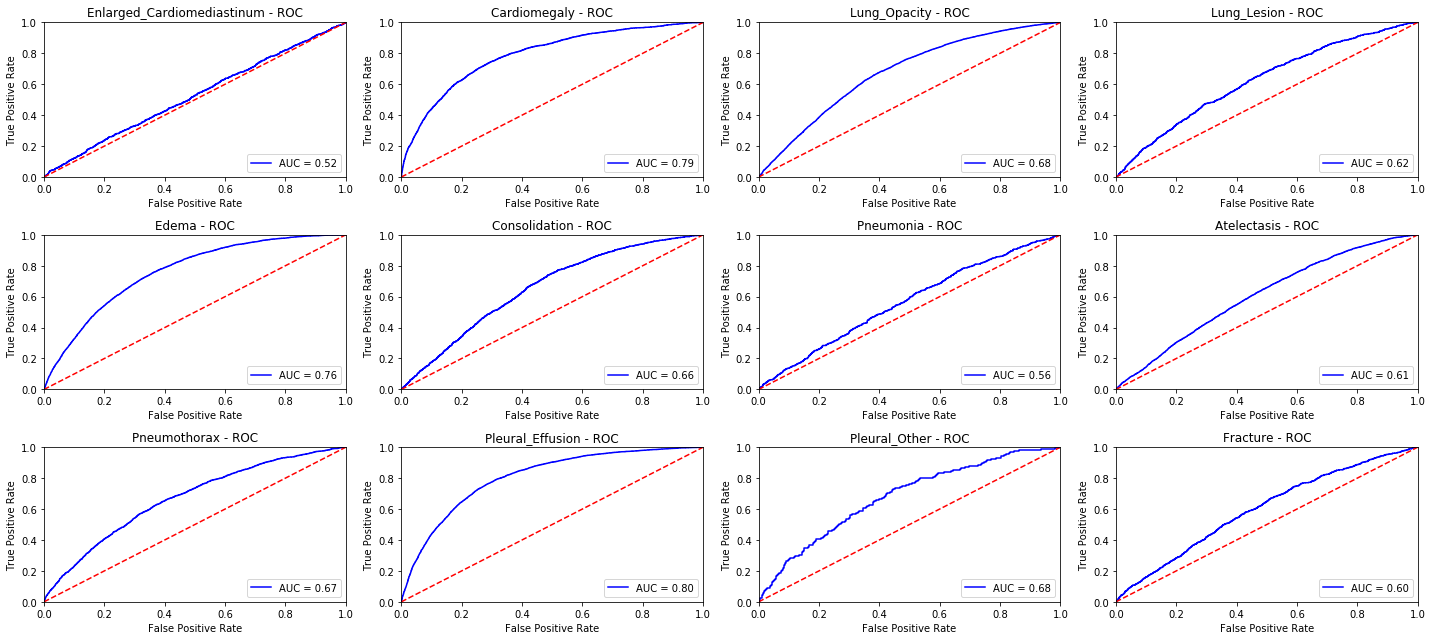

***** Precision / Recall *****


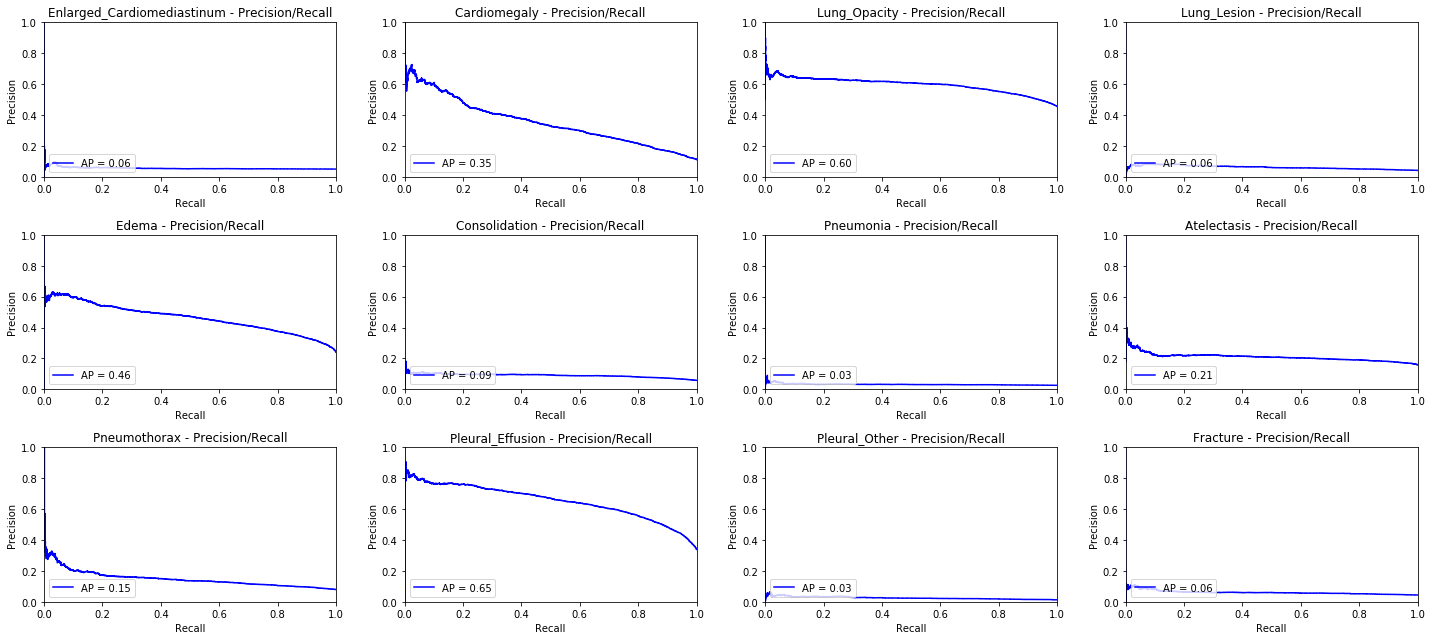


VALIDATION



,Score for all Targets
Accuracy Score,0.237244
Hamming Loss,0.117596
Combined Recall,0.294153
Combined Precision,0.328717
Combined F1,0.292165


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,249,0.000000,0.000000,0.000000,0.595957,0.066748
1,Cardiomegaly,530,0.084906,0.592105,0.148515,0.813486,0.378831
2,Lung_Opacity,2318,0.694133,0.591979,0.638999,0.688389,0.617490
3,Lung_Lesion,208,0.000000,0.000000,0.000000,0.657917,0.073283
4,Edema,1182,0.263959,0.570384,0.360902,0.771076,0.484798
5,Consolidation,308,0.000000,0.000000,0.000000,0.672936,0.098948
6,Pneumonia,140,0.000000,0.000000,0.000000,0.595843,0.040059
7,Atelectasis,781,0.000000,0.000000,0.000000,0.610399,0.208043
8,Pneumothorax,423,0.000000,0.000000,0.000000,0.689568,0.155129
9,Pleural_Effusion,1763,0.678389,0.626834,0.651594,0.806934,0.665947


***** ROC *****


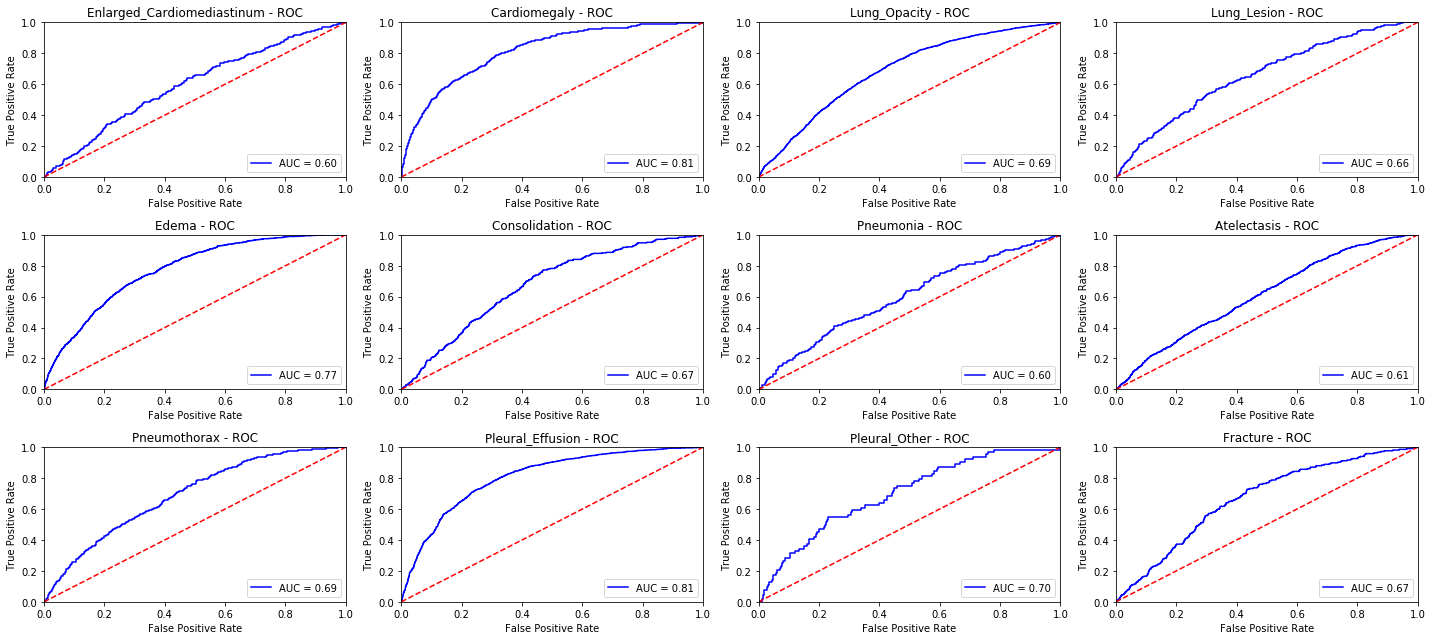

***** Precision / Recall *****


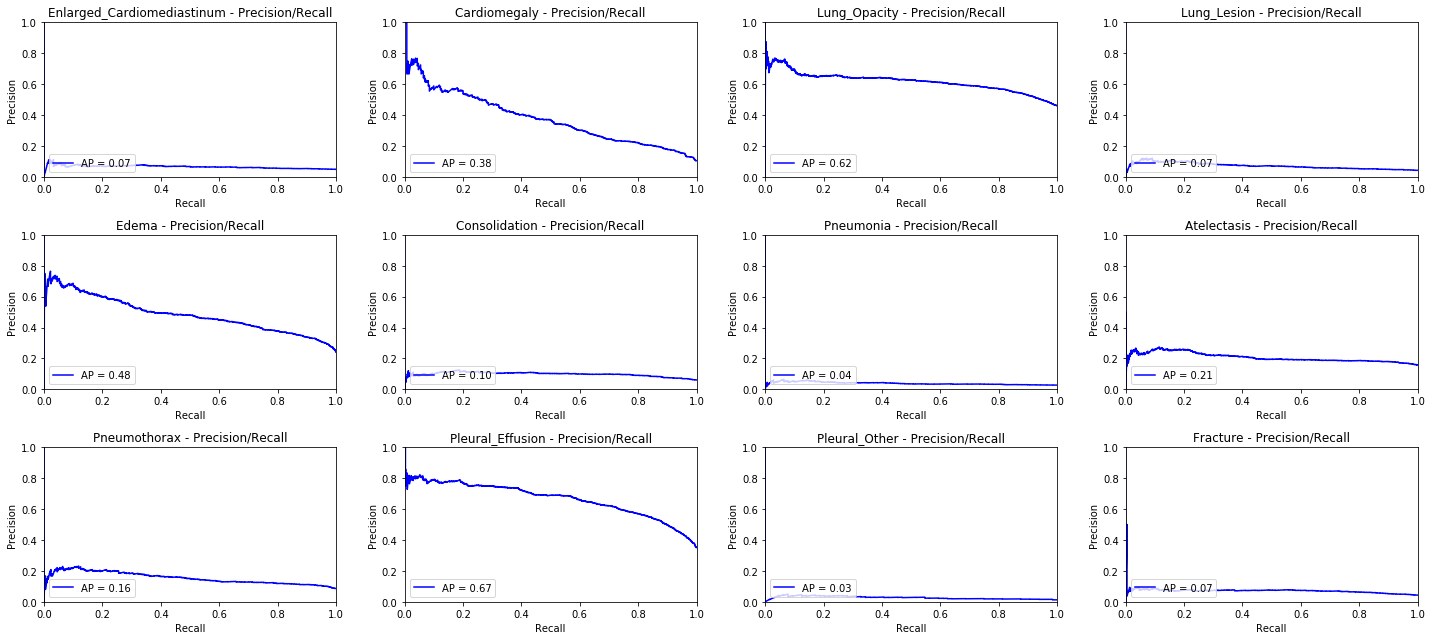

In [7]:
standardTraining.displayMetrics()